In [1]:
###導入會用到的函示庫
import numpy as np
import os, glob, random, cv2
import matplotlib.pyplot as plt
from sklearn.svm import SVC #svm classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA



dimension10: PCA using SVM Recognition rate: 90.00%


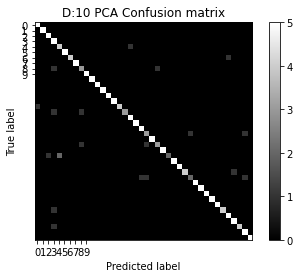

dimension10: LDA using SVM Recognition rate: 93.50%


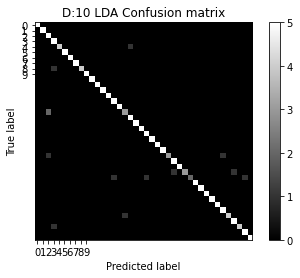

dimension20: PCA using SVM Recognition rate: 94.00%


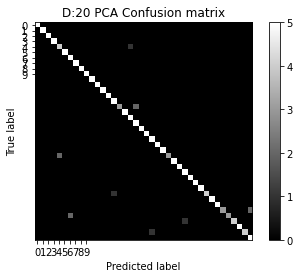

dimension20: LDA using SVM Recognition rate: 93.00%


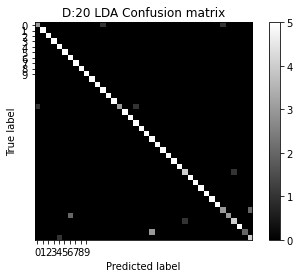

dimension30: PCA using SVM Recognition rate: 93.00%


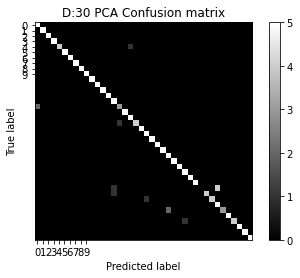

dimension30: LDA using SVM Recognition rate: 94.50%


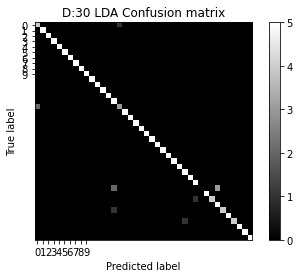

dimension40: PCA using SVM Recognition rate: 96.50%


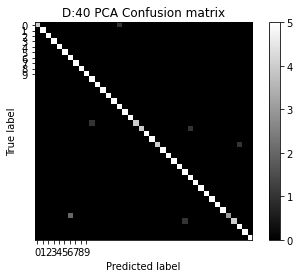

dimension40: LDA using SVM Recognition rate: 96.00%


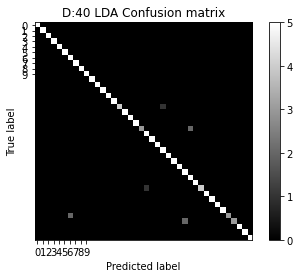

dimension50: PCA using SVM Recognition rate: 96.00%


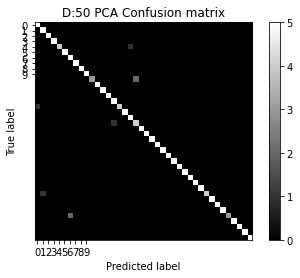

dimension50: LDA using SVM Recognition rate: 96.00%


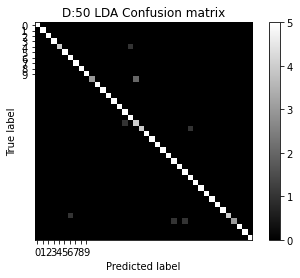

In [2]:
###分類器:SVM
for dimension in range(10, 60, 10):#10 20 30 40 50維
    
    ###準備training_data and testing_data
    folder="C:\\Users\\rachel\\Desktop\\HW2_FaceRecognition\\att_faces"
    trainD = []
    testD = []
    yTrain = []
    yTest = []
    sampleCount=5 
    for k in range(40):
        folder2 = os.path.join(folder ,'s%d' % (k + 1)) #load imagedata
        data = [cv2.imread(d, 0) for d in glob.glob(os.path.join(folder2, '*.pgm'))]
        sample = random.sample(range(10), sampleCount) #從每個人的10張圖中，隨機取5張
        trainD.extend([data[i].ravel() for i in range(10) if i in sample])#取到的當training data->trainD
        testD.extend([data[i].ravel() for i in range(10) if i not in sample])#沒取到的當testing data->testD
        yTest.extend([k] * (10 - sampleCount))
        yTrain.extend([k] * sampleCount)

    xTrain = np.array(trainD)
    yTrain = np.array(yTrain)
    xTest = np.array(testD)
    yTest = np.array(yTest)


    ###PCA
    pca = PCA(n_components=dimension)
    pca.fit(xTrain)
    PxTrain = pca.transform(xTrain)
    PxTest = pca.transform(xTest)
    ###support vector machine對PCA後的結果分類
    svm = SVC(kernel='linear')  
    svm.fit(np.array(PxTrain), np.float32(yTrain))
    Presult = yTest.tolist()
    Pans = svm.predict(np.float32(PxTest))
    print('dimension%d: PCA using SVM Recognition rate: %.2f%%' % (dimension, (Pans == np.array(yTest)).mean() * 100))
    
    ###畫出PCA的confusion_matrix
    Pconfusion_mat = confusion_matrix(Presult, Pans)
    plt.imshow(Pconfusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('D:{} {} Confusion matrix'.format(dimension,"PCA"))
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    ###LDA
    lda = LDA()
    lda.fit(PxTrain, yTrain)
    LxTrain = lda.transform(PxTrain)
    LxTest = lda.transform(PxTest)
    
    ###support vector machine對LDA後的結果分類
    svm = SVC(kernel='linear') 
    svm.fit(np.array(LxTrain), np.float32(yTrain))
    Lresult = yTest.tolist()
    Lans = svm.predict(np.float32(LxTest))
    print('dimension%d: LDA using SVM Recognition rate: %.2f%%' % (dimension, (Lans == np.array(yTest)).mean() * 100))
    
    ###畫出PCA的confusion_matrix
    Lconfusion_mat = confusion_matrix(Lresult, Lans)
    plt.imshow(Lconfusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('D:{} {} Confusion matrix'.format(dimension,"LDA"))
    plt.colorbar()
    #tick_marks = np.array(range(len(Lconfusion_mat)))
    tick_marks = np.arange(10)
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

dimension10: PCA using knn Recognition rate: 71.00%


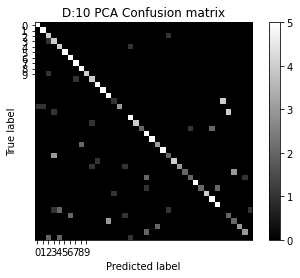

dimension10: LDA using knn Recognition rate: 78.00%


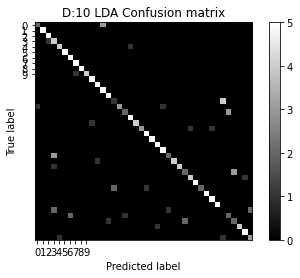

dimension20: PCA using knn Recognition rate: 79.00%


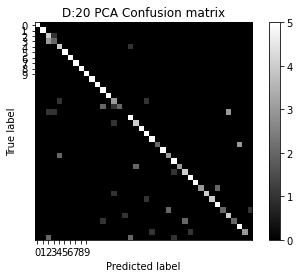

dimension20: LDA using knn Recognition rate: 88.00%


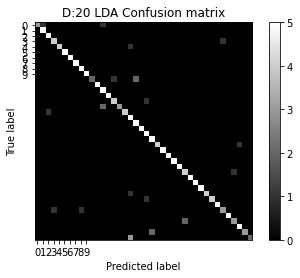

dimension30: PCA using knn Recognition rate: 82.00%


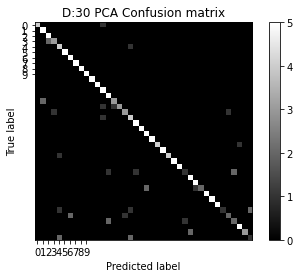

dimension30: LDA using knn Recognition rate: 92.00%


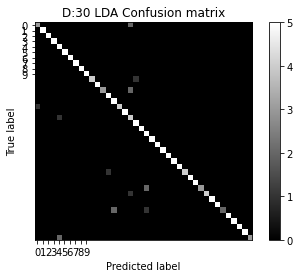

dimension40: PCA using knn Recognition rate: 76.00%


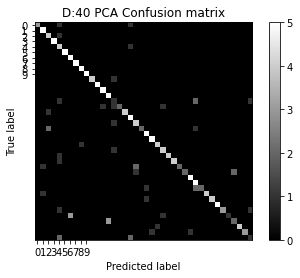

dimension40: LDA using knn Recognition rate: 90.00%


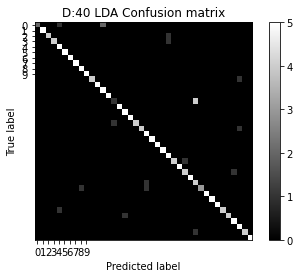

dimension50: PCA using knn Recognition rate: 79.00%


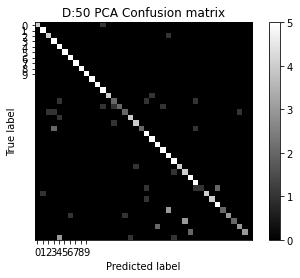

dimension50: LDA using knn Recognition rate: 95.00%


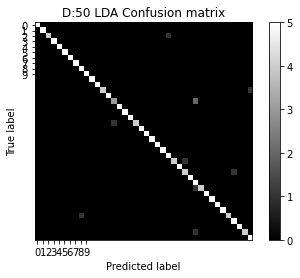

In [3]:
###分類器:KNN
for dimension in range(10, 60, 10):#10 20 30 40 50維
    
    ###準備training_data and testing_data
    folder="C:\\Users\\rachel\\Desktop\\HW2_FaceRecognition\\att_faces"
    trainD = []
    testD = []
    yTrain = []
    yTest = []
    sampleCount=5 
    for k in range(40):
        folder2 = os.path.join(folder ,'s%d' % (k + 1)) #load imagedata
        data = [cv2.imread(d, 0) for d in glob.glob(os.path.join(folder2, '*.pgm'))]
        sample = random.sample(range(10), sampleCount) #從每個人的10張圖中，隨機取5張
        trainD.extend([data[i].ravel() for i in range(10) if i in sample])#取到的當training data->trainD
        testD.extend([data[i].ravel() for i in range(10) if i not in sample])#沒取到的當testing data->testD
        yTest.extend([k] * (10 - sampleCount))
        yTrain.extend([k] * sampleCount)

    xTrain = np.array(trainD)
    yTrain = np.array(yTrain)
    xTest = np.array(testD)
    yTest = np.array(yTest)


    ###PCA
    pca = PCA(n_components=dimension)
    pca.fit(xTrain)
    PxTrain = pca.transform(xTrain)
    PxTest = pca.transform(xTest)
    ###knn對PCA後的結果分類
    knn = KNeighborsClassifier()  
    knn.fit(np.array(PxTrain), np.float32(yTrain))
    Presult = yTest.tolist()
    Pans = knn.predict(np.float32(PxTest))
    print('dimension%d: PCA using knn Recognition rate: %.2f%%' % (dimension, (Pans == np.array(yTest)).mean() * 100))
    
    ###畫出PCA的confusion_matrix
    Pconfusion_mat = confusion_matrix(Presult, Pans)
    plt.imshow(Pconfusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('D:{} {} Confusion matrix'.format(dimension,"PCA"))
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
    ###LDA
    lda = LDA()
    lda.fit(PxTrain, yTrain)
    LxTrain = lda.transform(PxTrain)
    LxTest = lda.transform(PxTest)
    
    ###knn對LDA後的結果分類
    knn = KNeighborsClassifier()
    knn.fit(np.array(LxTrain), np.float32(yTrain))
    Lresult = yTest.tolist()
    Lans = knn.predict(np.float32(LxTest))
    print('dimension%d: LDA using knn Recognition rate: %.2f%%' % (dimension, (Lans == np.array(yTest)).mean() * 100))
    
    ###畫出PCA的confusion_matrix
    Lconfusion_mat = confusion_matrix(Lresult, Lans)
    plt.imshow(Lconfusion_mat, interpolation='nearest', cmap=plt.cm.gray)
    plt.title('D:{} {} Confusion matrix'.format(dimension,"LDA"))
    plt.colorbar()
    #tick_marks = np.array(range(len(Lconfusion_mat)))
    tick_marks = np.arange(10)
    plt.xticks(tick_marks)
    plt.yticks(tick_marks)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()